<a href="https://colab.research.google.com/github/Swapnil-Giram/Classification/blob/main/OLa_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = "/content/drive/MyDrive/ola_driver_scaler.csv"

In [ ]:
df = pd.read_csv(data)  # loding the data

In [ ]:
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [ ]:
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
# converting date columns into datetime object type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'],format= '%d/%m/%y')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'],format='%d/%m/%y')
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'],format='%d/%m/%y')

### handling missing value

In [ ]:
df.dtypes # checking the type of columns

MMM-YY                  datetime64[ns]
Driver_ID                        int64
Age                            float64
Gender                         float64
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
dtype: object

In [ ]:
df.isnull().sum() # cheacking null values of the columns

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
num_columns = df[['Age','Gender','Education_Level','Income','Joining Designation','Grade','Total Business Value','Quarterly Rating']]
num_columns

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2,57387,1,1,2381060,2
1,28.0,0.0,2,57387,1,1,-665480,2
2,28.0,0.0,2,57387,1,1,0,2
3,31.0,0.0,2,67016,2,2,0,1
4,31.0,0.0,2,67016,2,2,0,1
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2,70254,2,2,740280,3
19100,30.0,0.0,2,70254,2,2,448370,3
19101,30.0,0.0,2,70254,2,2,0,2
19102,30.0,0.0,2,70254,2,2,200420,2


In [ ]:
#  there is  much null values in dataset
# so we can use knn to impute null values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(num_columns)
df_imputed

array([[ 2.80000e+01,  0.00000e+00,  2.00000e+00, ...,  1.00000e+00,
         2.38106e+06,  2.00000e+00],
       [ 2.80000e+01,  0.00000e+00,  2.00000e+00, ...,  1.00000e+00,
        -6.65480e+05,  2.00000e+00],
       [ 2.80000e+01,  0.00000e+00,  2.00000e+00, ...,  1.00000e+00,
         0.00000e+00,  2.00000e+00],
       ...,
       [ 3.00000e+01,  0.00000e+00,  2.00000e+00, ...,  2.00000e+00,
         0.00000e+00,  2.00000e+00],
       [ 3.00000e+01,  0.00000e+00,  2.00000e+00, ...,  2.00000e+00,
         2.00420e+05,  2.00000e+00],
       [ 3.00000e+01,  0.00000e+00,  2.00000e+00, ...,  2.00000e+00,
         4.11480e+05,  2.00000e+00]])

In [ ]:
#deleting num columns that are alredy present in the dataset
df.drop(['Age','Gender','Education_Level','Income','Joining Designation','Grade','Total Business Value','Quarterly Rating'],axis=1,inplace=True)

In [ ]:
d = pd.DataFrame(df_imputed,columns=['age','gender','education_Level','income','joining Designation','grade','total Business Value','quarterly Rating'])
df = pd.concat([df,d],axis=1)
df

,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate,age,gender,education_Level,income,joining Designation,grade,total Business Value,quarterly Rating
0,2019-01-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-01-02,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-01-03,1,C23,2018-12-24,2019-11-03,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-01-11,2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-01-12,2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-01-08,2788,C27,2020-08-06,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,2020-01-09,2788,C27,2020-08-06,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,2020-01-10,2788,C27,2020-08-06,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,2020-01-11,2788,C27,2020-08-06,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [ ]:
df.head(5)

,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate,age,gender,education_Level,income,joining Designation,grade,total Business Value,quarterly Rating
0,2019-01-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-01-02,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-01-03,1,C23,2018-12-24,2019-11-03,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-01-11,2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-01-12,2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [ ]:
df.isnull().sum() # cheacking null value after imputation of null values

MMM-YY                      0
Driver_ID                   0
City                        0
Dateofjoining               0
LastWorkingDate         17488
age                         0
gender                      0
education_Level             0
income                      0
joining Designation         0
grade                       0
total Business Value        0
quarterly Rating            0
dtype: int64

In [ ]:
df.nunique() # checking the unique values

MMM-YY                     24
Driver_ID                2381
City                       29
Dateofjoining             869
LastWorkingDate           493
age                        70
gender                      6
education_Level             3
income                   2383
joining Designation         5
grade                       5
total Business Value    10181
quarterly Rating            4
dtype: int64

### Feature Engineering

In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'City', 'Dateofjoining', 'LastWorkingDate',
       'age', 'gender', 'education_Level', 'income', 'joining Designation',
       'grade', 'total Business Value', 'quarterly Rating'],
      dtype='object')

In [ ]:
df.head(5)

,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate,age,gender,education_Level,income,joining Designation,grade,total Business Value,quarterly Rating
0,2019-01-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-01-02,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-01-03,1,C23,2018-12-24,2019-11-03,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-01-11,2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-01-12,2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


 creating a new column to check quaterly **rating** increased or not

In [ ]:
# Creating a column to check whether the rating is increased or not
df['rating change'] = df.groupby('Driver_ID')['quarterly Rating'].diff()
df['increase rating'] = df['rating change'].apply(lambda x: 1 if x > 0 else 0)    # rating increased marks as 1 else 0

In [ ]:
df.drop('rating change',axis=1,inplace=True)

In [ ]:
df['increase rating'].value_counts()

increase rating
0    17859
1     1245
Name: count, dtype: int64

Adding a new column for marking age into bins as
('Young' (18-30), 'Middle-aged'(31-50), 'Senior' (50+))

In [ ]:
df['age group'] = df['age'].apply(lambda x: 'Young' if x < 30 else('Middle-aged' if x > 30 and x <50 else 'Senior'))

creating a new column to check Driver income increased or not

In [ ]:
# Creating a column to check whether the rating is increased or not
df['income diff'] = df.groupby('Driver_ID')['income'].diff()
df['increase income'] = df['income diff'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df.drop('income diff',axis=1,inplace=True)

In [ ]:
df['increase income'].value_counts()

increase income
0    19060
1       44
Name: count, dtype: int64




1.    creating Target column from LastWorkingDate column if column has nan value than 0 else 1
2.   so that nan vlaue is saying driver is not left and not null value for driver left the commpany

In [ ]:
df['Target'] = np.where(df['LastWorkingDate'].notna(), 1, 0)
df

,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate,age,gender,education_Level,income,joining Designation,grade,total Business Value,quarterly Rating,increase rating,age group,increase income,Target
0,2019-01-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,0,Young,0,0
1,2019-01-02,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,0,Young,0,0
2,2019-01-03,1,C23,2018-12-24,2019-11-03,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,0,Young,0,1
3,2020-01-11,2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,Middle-aged,0,0
4,2020-01-12,2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,Middle-aged,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-01-08,2788,C27,2020-08-06,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0,0,Senior,0,0
19100,2020-01-09,2788,C27,2020-08-06,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0,0,Senior,0,0
19101,2020-01-10,2788,C27,2020-08-06,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0,0,Senior,0,0
19102,2020-01-11,2788,C27,2020-08-06,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0,0,Senior,0,0


In [ ]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'City', 'Dateofjoining', 'LastWorkingDate',
       'age', 'gender', 'education_Level', 'income', 'joining Designation',
       'grade', 'total Business Value', 'quarterly Rating', 'increase rating',
       'age group', 'increase income', 'Target'],
      dtype='object')

Grouping and aggrigating all the columns on the driver id

In [ ]:
function  = {'City':'last',
             'Dateofjoining':'last',
             'LastWorkingDate':'last',
             'age':'max',
             'gender':'last',
             'education_Level':'last',
             'income': 'last',
             'joining Designation':'last',
             'grade': 'last',
             'total Business Value':'sum',
             'quarterly Rating':'last',
             'increase rating':'last',
             'age group':'last',
             'increase income':'last',
             'Target':'last'
             }

In [ ]:
# dff['age'] = list(df.groupby('Driver_ID',axis=0).max('MMM-YY')['age'])
# dff['gender'] = list(df.groupby('Driver_ID').agg({'gender':'last'})['gender'])
# dff['City'] = list(df.groupby('Driver_ID').agg({'City':'last'})['City'])
# dff['education_Level'] = list(df.groupby('Driver_ID').agg({'education_Level':'last'})['education_Level'])
# dff['income'] = list(df.groupby('Driver_ID').agg({'income':'last'})['income'])
# dff['joining_Designation'] = list(df.groupby('Driver_ID').agg({'joining Designation':'last'})['joining Designation'])
# dff['grade'] = list(df.groupby('Driver_ID').agg({'grade':'last'})['grade'])
# dff['total_Business_Value'] = list(df.groupby('Driver_ID',axis=0).sum('total Business Value')['total Business Value'])
# dff['quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'quarterly Rating':'last'})['quarterly Rating'])
# dff['increase rating'] = list(df.groupby('Driver_ID').agg({'increase rating':'last'})['increase rating'])
# dff['age group'] = list(df.groupby('Driver_ID').agg({'age group':'last'})['age groupg'])
# dff['increase income'] = list(df.groupby('Driver_ID').agg({'increase income':'last'})['increase income'])
# dff['Target'] = list(df.groupby('Driver_ID').agg({'Target':'last'})['Target'])


In [ ]:
dff = df.groupby('Driver_ID').aggregate(function)
dff.head()

,City,Dateofjoining,LastWorkingDate,age,gender,education_Level,income,joining Designation,grade,total Business Value,quarterly Rating,increase rating,age group,increase income,Target
Driver_ID,,,,,,,,,,,,,,,
1,C23,2018-12-24,2019-11-03,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,Young,0,1
2,C7,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,Middle-aged,0,0
4,C13,2019-07-12,2020-04-27,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,0,Middle-aged,0,1
5,C9,2019-09-01,2019-07-03,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,0,Young,0,1
6,C11,2020-07-31,NaT,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,0,Middle-aged,0,0


Distribution of continuous features

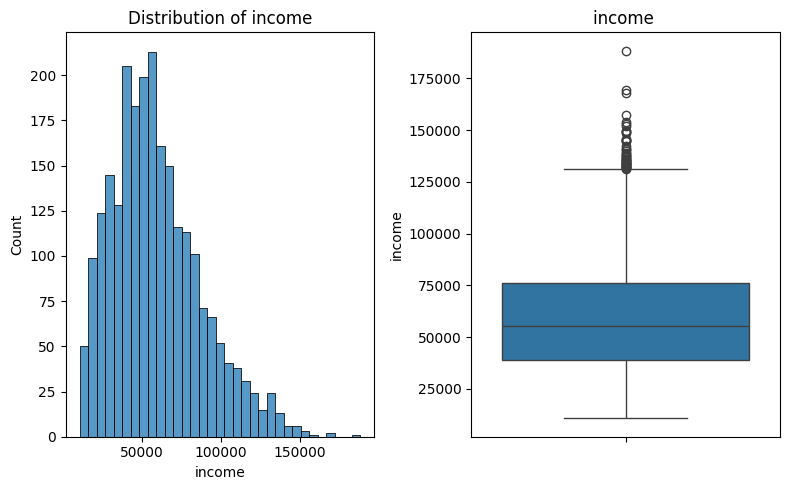

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,5))

sns.histplot(dff['income'],ax=axes[0])
axes[0].set_title('Distribution of income')

sns.boxplot(dff['income'],ax=axes[1])
axes[1].set_title('income ')
plt.tight_layout()

plt.show()

Distribution of income is right skewed and
more outliers present\ in income columns

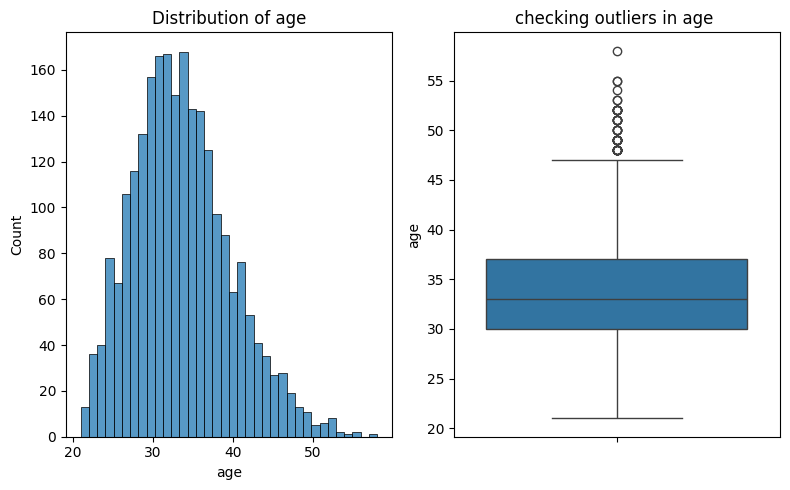

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,5))

sns.histplot(dff['age'],ax=axes[0])
axes[0].set_title('Distribution of age')

sns.boxplot(dff['age'],ax=axes[1])
axes[1].set_title('checking outliers in age ')
plt.tight_layout()

plt.show()

Distribution of age is litte bit right skewed and some outliers present in in columns

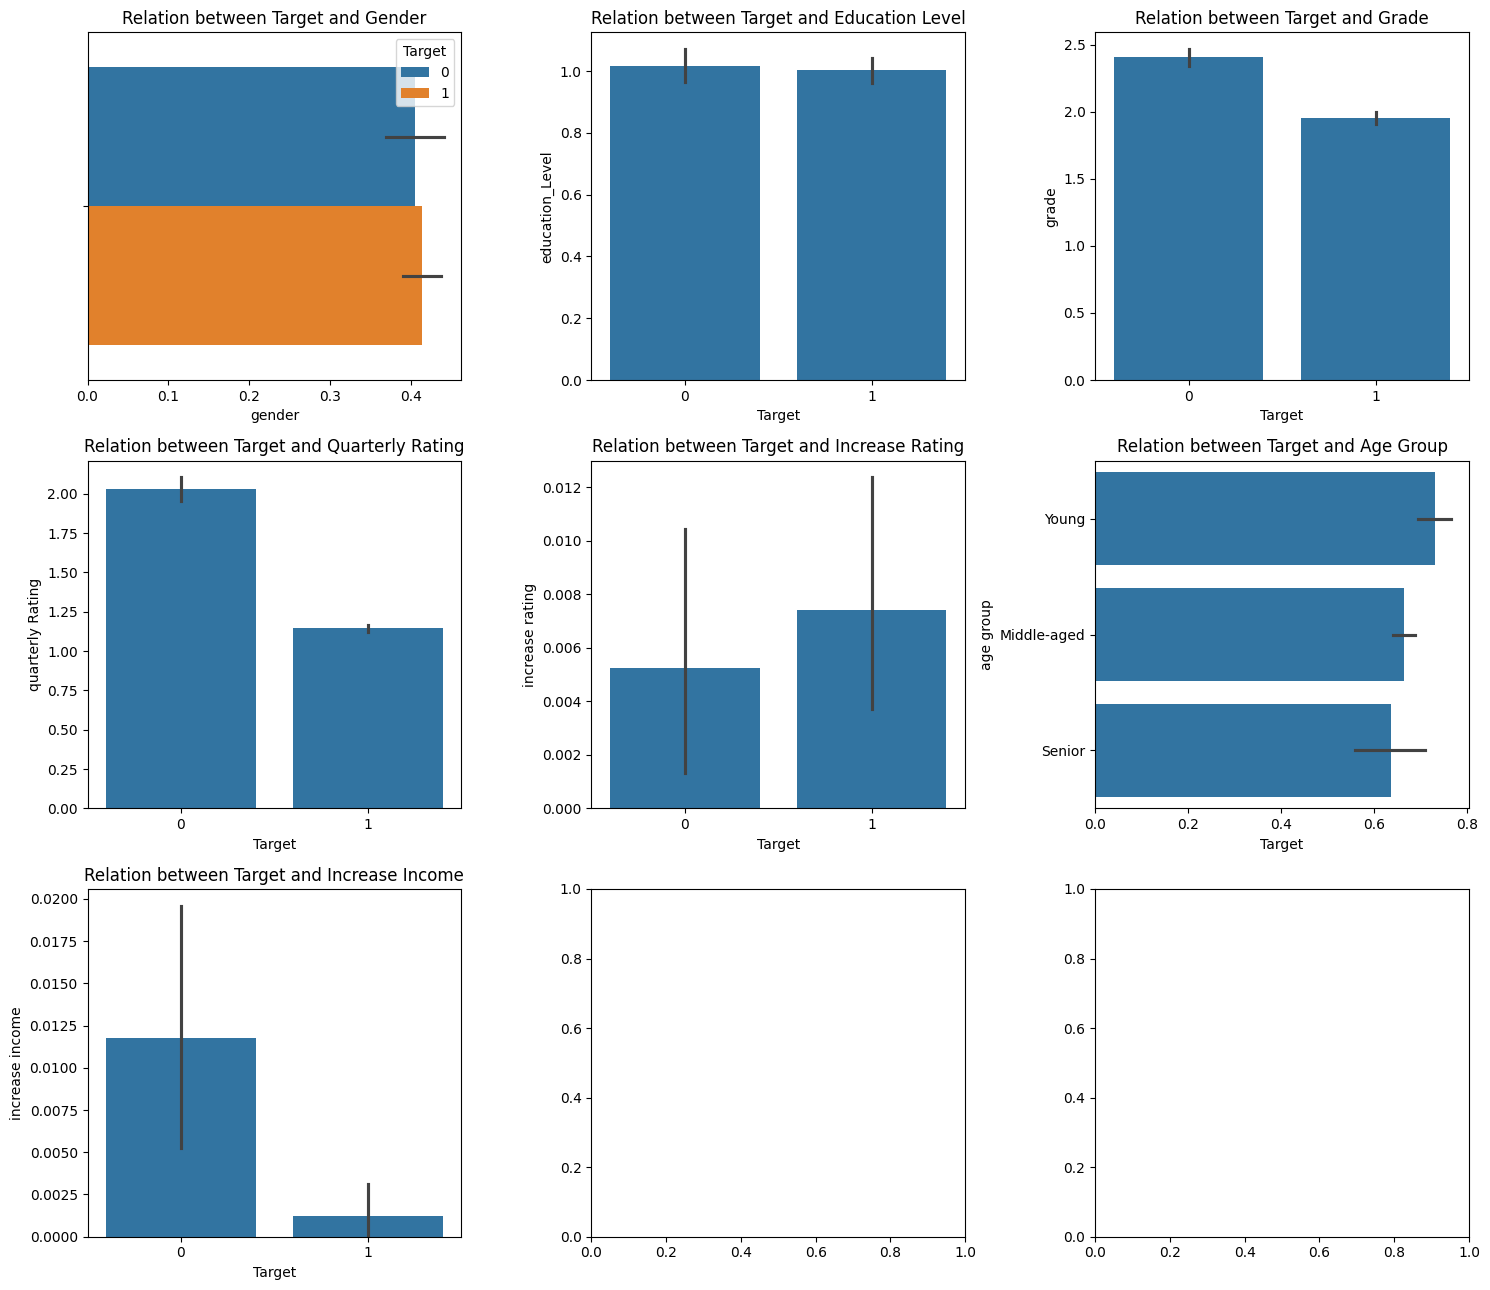

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 13))

# Adjust the spacing between plots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plotting each barplot on different axes
sns.barplot(x='gender', data=dff, hue='Target', ax=axes[0, 0])
axes[0, 0].set_title('Relation between Target and Gender')

sns.barplot(x='Target', y='education_Level', data=dff, ax=axes[0, 1])
axes[0, 1].set_title('Relation between Target and Education Level')

sns.barplot(x='Target', y='grade', data=dff, ax=axes[0, 2])
axes[0, 2].set_title('Relation between Target and Grade')

sns.barplot(x='Target', y='quarterly Rating', data=dff, ax=axes[1, 0])
axes[1, 0].set_title('Relation between Target and Quarterly Rating')

sns.barplot(x='Target', y='increase rating', data=dff, ax=axes[1, 1])
axes[1, 1].set_title('Relation between Target and Increase Rating')

sns.barplot(x='Target', y='age group', data=dff, ax=axes[1, 2])
axes[1, 2].set_title('Relation between Target and Age Group')

sns.barplot(x='Target', y='increase income', data=dff, ax=axes[2, 0])
axes[2, 0].set_title('Relation between Target and Increase Income')

plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
dff['increase rating'].value_counts()

increase rating
0    2365
1      16
Name: count, dtype: int64

In [ ]:
dff['City'].value_counts()

City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64

### **Data Preprocessing**

In [ ]:
df.head(2)

,MMM-YY,Driver_ID,City,Dateofjoining,LastWorkingDate,age,gender,education_Level,income,joining Designation,grade,total Business Value,quarterly Rating,increase rating,age group,increase income,Target
0,2019-01-01,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,0,Young,0,0
1,2019-01-02,1,C23,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,0,Young,0,0


In [ ]:
# use target encoding on city column to transfer data into numerical vlaue
target_encoding = df.groupby('City')['Target'].mean()
dff['City'] = df['City'].map(target_encoding)
dff

,City,Dateofjoining,LastWorkingDate,age,gender,education_Level,income,joining Designation,grade,total Business Value,quarterly Rating,increase rating,age group,increase income,Target
Driver_ID,,,,,,,,,,,,,,,
1,0.105948,2018-12-24,2019-11-03,28.0,0.0,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,Young,0,1
2,0.105948,2020-06-11,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,0,Middle-aged,0,0
4,0.085386,2019-07-12,2020-04-27,43.0,0.0,2.0,65603.0,2.0,2.0,350000.0,1.0,0,Middle-aged,0,1
5,0.101933,2019-09-01,2019-07-03,29.0,0.0,0.0,46368.0,1.0,1.0,120360.0,1.0,0,Young,0,1
6,0.101933,2020-07-31,NaT,31.0,1.0,1.0,78728.0,3.0,3.0,1265000.0,2.0,0,Middle-aged,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,0.076336,2015-10-15,NaT,34.0,0.0,0.0,82815.0,2.0,3.0,21748820.0,4.0,0,Middle-aged,0,0
2785,0.076336,2020-08-28,2020-10-28,34.0,1.0,0.0,12105.0,1.0,1.0,0.0,1.0,0,Middle-aged,0,1
2786,0.076336,2018-07-31,2019-09-22,45.0,0.0,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,Middle-aged,0,1


### Model Building

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#For shapiro test
from scipy.stats import shapiro
#For train-test split
from sklearn.model_selection import train_test_split,GridSearchCV
#For RandomForest
from sklearn.ensemble import RandomForestClassifier
#Accuracy score, confusion matrix, classification report, ROC curve, AUC
from sklearn.metrics import f1_score
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
x = dff.drop(['age group','Target','Dateofjoining','LastWorkingDate'],axis=1)


In [ ]:
# scaling the columns from the data
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scale = scale.fit_transform(x)

In [ ]:
x_scale = pd.DataFrame(x_scale,columns=x.columns)
y = dff['Target']


In [ ]:
# spliting the data into train test split
x_train , x_test, y_train, y_test = train_test_split(x_scale,y,test_size=0.20,random_state=20)


In [ ]:
parameter = {'n_estimators':[50,100,150,200],'max_depth':[2,3,4,5],'criterion':['gini','entropy']}
random = RandomForestClassifier(class_weight ='balanced_subsample')
c = GridSearchCV(random,parameter,cv=5,scoring='recall')
model = c.fit(x_train,y_train)

In [ ]:
model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 150}

In [ ]:
model.best_score_


0.8840591421986771

In [ ]:
pred = model.predict(x_test)

In [ ]:
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.61      0.68       155
           1       0.83      0.92      0.87       322

    accuracy                           0.82       477
   macro avg       0.81      0.76      0.78       477
weighted avg       0.81      0.82      0.81       477



In [ ]:
# the data is imbalanced so we can use the smote technique to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Class distribution before SMOTE:", np.bincount(y_train))
print("Class distribution after SMOTE:", np.bincount(y_train_res))


Class distribution before SMOTE: [ 610 1294]
Class distribution after SMOTE: [1294 1294]


In [ ]:
parameter = {'n_estimators':[50,100,150,200],'max_depth':[2,3,4,5],'criterion':['gini','entropy']}
random = RandomForestClassifier(class_weight ='balanced_subsample')
c = GridSearchCV(random,parameter,cv=5,scoring='accuracy')
model = c.fit(X_train_res, y_train_res)

In [ ]:
model.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}

In [ ]:
model.best_score_


0.7724166000761745

In [ ]:
pred = model.predict(x_test)

In [ ]:
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       155
           1       0.85      0.86      0.85       322

    accuracy                           0.80       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.80      0.80      0.80       477



after balancing the data using smote the accuracy increased

applying random forest with the best parameters

In [ ]:
random = RandomForestClassifier(criterion='entropy', max_depth = 5, n_estimators = 200 ,class_weight ='balanced')

models = random.fit(X_train_res, y_train_res)

In [ ]:
preds = models.predict(x_test)

In [ ]:
report = classification_report(y_test, preds)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       155
           1       0.85      0.86      0.85       322

    accuracy                           0.80       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.80      0.80      0.80       477



**applying boost techinique **

In [ ]:
import xgboost as xgb
xg = xgb.XGBClassifier()
xg_model = xg.fit(x_train,y_train)

In [ ]:
xg_preds = xg_model.predict(x_test)

In [ ]:
report = classification_report(y_test, xg_preds)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.51      0.58       155
           1       0.79      0.88      0.83       322

    accuracy                           0.76       477
   macro avg       0.73      0.69      0.70       477
weighted avg       0.75      0.76      0.75       477



In [ ]:
# now applying xgboost on xg boost balanced data
import xgboost as xgb
xg = xgb.XGBClassifier()
xg_models = xg.fit(X_train_res, y_train_res)

In [ ]:
xg_pred = xg_models.predict(x_test)

In [ ]:
report = classification_report(y_test, xg_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       155
           1       0.85      0.86      0.85       322

    accuracy                           0.80       477
   macro avg       0.77      0.77      0.77       477
weighted avg       0.80      0.80      0.80       477

